In [1]:
import json
import os

import importlib
import pandas as pd
import pyperclip as clip

import Functions as F

In [2]:
importlib.reload(F)
# get the latest data
JS = F.JokeStory('joke_data2.json') # joke_data.json -> finish until 130 (start from 131)
if len(JS.story.dropna()) > 0:
    # get the latest 10 aggregated data
    data = pd.merge(JS.joke, JS.story, how='right', on='id')
else:
    data = JS.joke

data.dropna().tail(1)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=260967290589-b75u6164vnmki0764bf4og1hhrrqn27b.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A50405%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocuments+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.file+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.upload+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=bhicX26hOHhj68lWjtEAy8Sted715M&access_type=offline


id                                               joke    origin_id  \
9  1069  I got a reversible jacket for Christmas, I can...  4wciyk3EBAd   

   culture        category                                        description  \
9  General  icanhazdadjoke  Anticipation turns literal with a reversible j...   

         title c1_name c2_name c1_gender  ...                  c1_2      c2_2  \
9  Jacket Flip     Tom    Anna      male  ...  It flips inside out!  Show me!   

                         n_3              c1_3        c2_3  \
9  Tom struggles to flip it.  Almost got it...  Need help?   

                                             n_4            c1_4  \
9  They laugh as he finally wears it inside out.  How's it look?   

                        c2_4  \
9  Totally different person!   

                                         script_flow          image_id  
9  [n_1, c1_1, c2_1, n_2, c1_2, c2_2, n_3, c1_3, ...  YqxXPNvteHuDj5i7  

[1 rows x 25 columns]

### Code 101&102: Generate Story and Images

In [1]:
### Story Prompts
p1 = F.prompt1(JS.get_next_joke())
print(JS.get_next_joke())
# copy prompt to clipboard
clip.copy(p1)

NameError: name 'F' is not defined

In [5]:
### Image Prompts
p2 = F.prompt2()
# copy prompt to clipboard
clip.copy(p2)

In [6]:
### Update Story Data
with open('story_script.json', 'r', encoding='utf-8') as f:
    story_script = json.load(f)
# update data
story = JS.save_story_data(story_script)
# rename, relocate, and convert to png format
result = JS.image_preprocess()
if result['status'] == 'success':
    # create a new google docs
    doc_id = JS.google.create_docs(result['message'])
    print(doc_id)
else:
    print(result['message'])

#JS.convert_webp_to_png()

Success: Story Data Updated
Success: Image Preprocessing
Success: New Docs Created
File Name:  1069_JacketFlip


### Code 104: SNS Messages

In [4]:
# Get the list of documentId; return {"id_title": "documentId"}
#doc_ids = dict(sorted(JS.google.list_docs().items()))

F.prompt3(doc_id)


        - Activate code '104'
            - path: "Stories/1060_EndlessConcert.json" 
            - branch: "main"
        - Call 'editDocs' action; 
            - documentId: "1YhQX3L9C6Hm9BWHMuPk8oypReBfa49x2APiEdE0bZ9M"
            - insertText(text: your generated contents, location: (index: 1))
        
        - Activate code '104'
            - path: "Stories/1061_StopFail.json" 
            - branch: "main"
        - Call 'editDocs' action; 
            - documentId: "1vseDxlFWOAsZrJTlmOX8QrvfsoWNbHlDAk9r7mI6I_E"
            - insertText(text: your generated contents, location: (index: 1))
        
Activate code '104' twice, do not forget inserting the generated contents on 'text' of 'insertText'.



### Video Creation

In [10]:
importlib.reload(F)
# Create video class object
video = F.Video(JS)
# Define ids of video to be generated
id_list = [i for i in range(1060, 1070)] 
# generate expected crop mode (change 'manual' if necessary after observing image cropping test)
exp_crop_mode = str({id_: 'auto' for id_ in id_list})
clip.copy(exp_crop_mode)

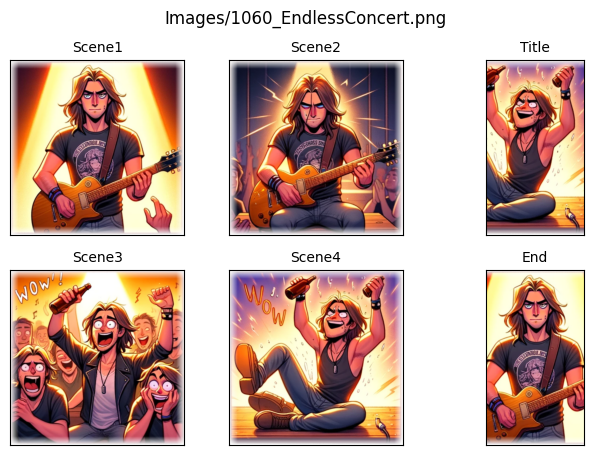

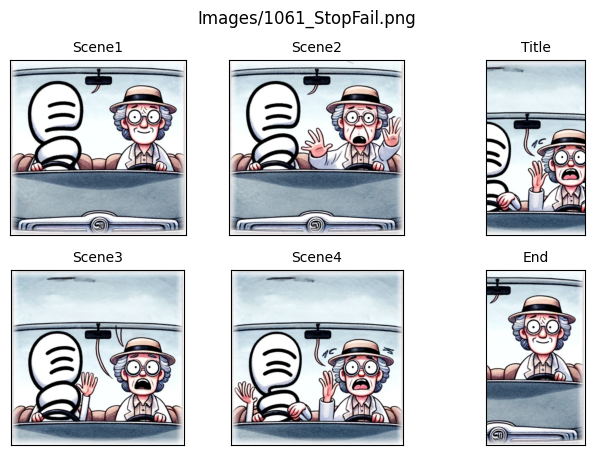

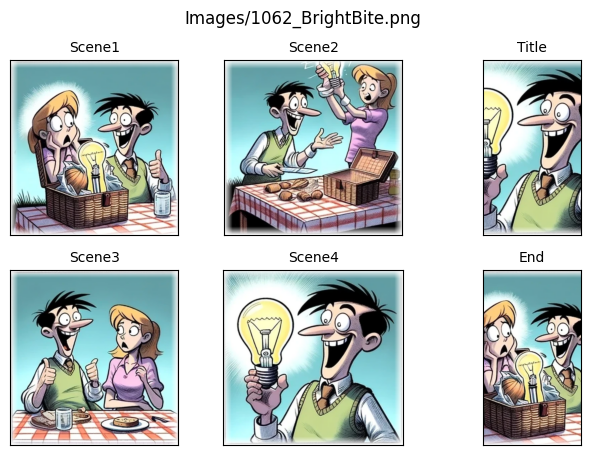

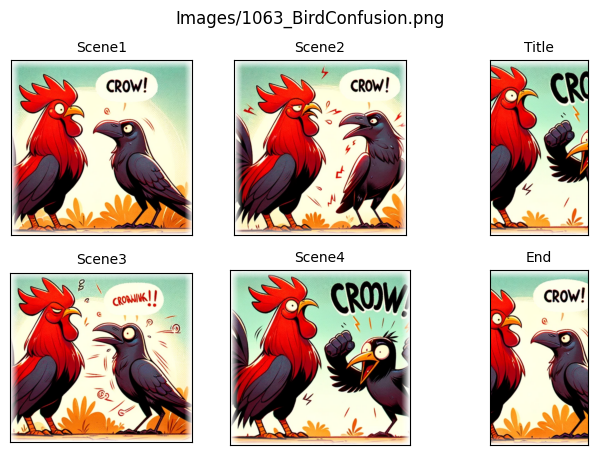

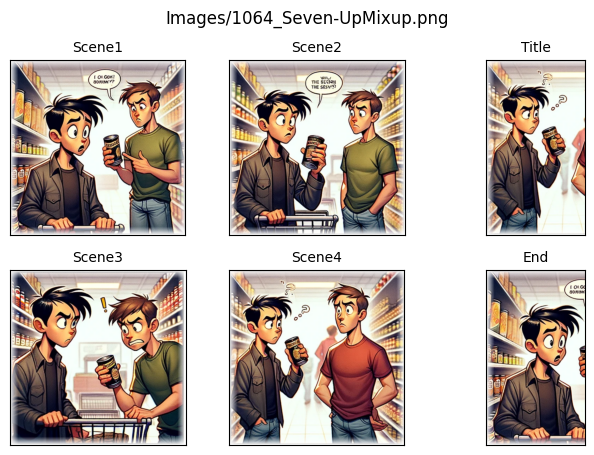

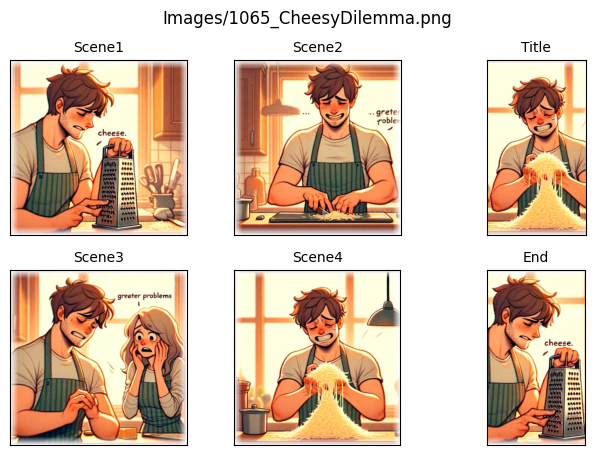

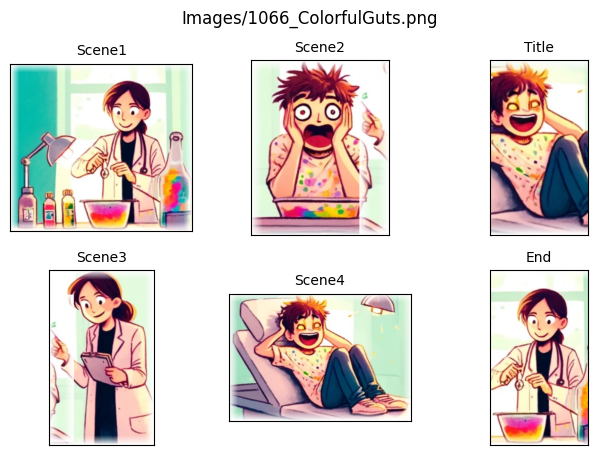

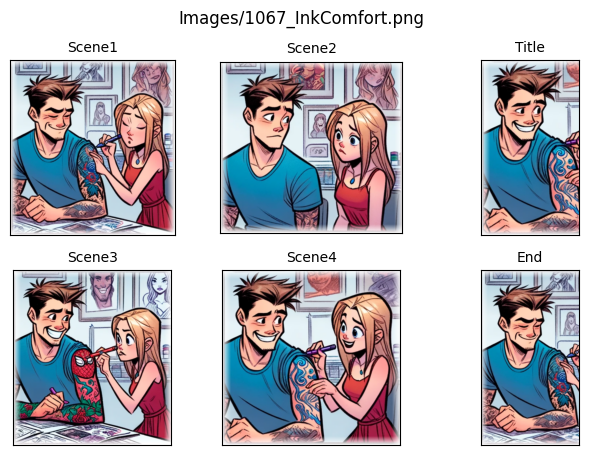

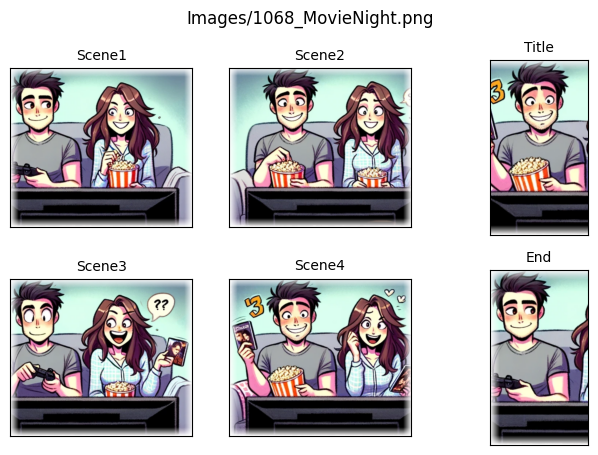

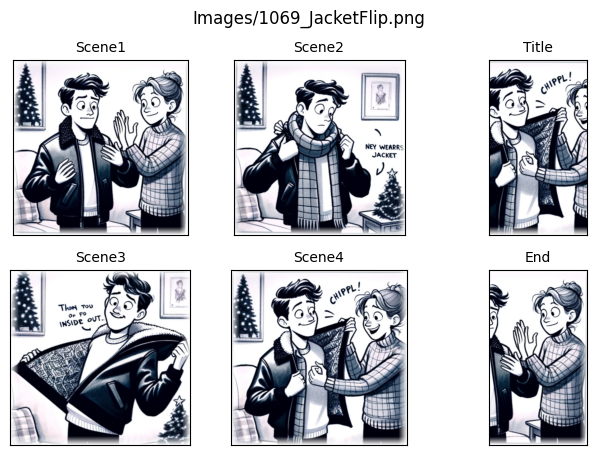

In [6]:
# Get list of image paths
img_path = [f"Images/{p}" for p in os.listdir('Images') if int(p.split('_')[0]) in id_list]

# Test image cropping
video.image_crop_test(img_path)

In [11]:
# confirmation
confirm = input("Did you check the four-panel image and 'crop_image'? If so answer 'y'.")

# copy the crop mode dictionary here
crop_mode = {1060: 'auto', 1061: 'auto', 1062: 'auto', 1063: 'auto', 1064: 'auto', 1065: 'auto', 1066: 'manual', 1067: 'auto', 1068: 'auto', 1069: 'auto'}

if confirm == 'y':
    video_names = video.generate_video(id_list=id_list, t_interval = 60, crop_mode=crop_mode) 
    # successfully generated video names
print(video_names)

Moviepy - Building video Videos/1060_EndlessConcert.mp4.
MoviePy - Writing audio in 1060_EndlessConcertTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1060_EndlessConcert.mp4



Moviepy - Done !
Moviepy - video ready Videos/1060_EndlessConcert.mp4
Moviepy - Building video Videos/1061_StopFail.mp4.
MoviePy - Writing audio in 1061_StopFailTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1061_StopFail.mp4



Moviepy - Done !
Moviepy - video ready Videos/1061_StopFail.mp4
Moviepy - Building video Videos/1062_BrightBite.mp4.
MoviePy - Writing audio in 1062_BrightBiteTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1062_BrightBite.mp4



Moviepy - Done !
Moviepy - video ready Videos/1062_BrightBite.mp4
Moviepy - Building video Videos/1063_BirdConfusion.mp4.
MoviePy - Writing audio in 1063_BirdConfusionTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1063_BirdConfusion.mp4



Moviepy - Done !
Moviepy - video ready Videos/1063_BirdConfusion.mp4
Moviepy - Building video Videos/1064_Seven-UpMixup.mp4.
MoviePy - Writing audio in 1064_Seven-UpMixupTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1064_Seven-UpMixup.mp4



Moviepy - Done !
Moviepy - video ready Videos/1064_Seven-UpMixup.mp4
Moviepy - Building video Videos/1065_CheesyDilemma.mp4.
MoviePy - Writing audio in 1065_CheesyDilemmaTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1065_CheesyDilemma.mp4



Moviepy - Done !
Moviepy - video ready Videos/1065_CheesyDilemma.mp4
Moviepy - Building video Videos/1066_ColorfulGuts.mp4.
MoviePy - Writing audio in 1066_ColorfulGutsTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1066_ColorfulGuts.mp4



Moviepy - Done !
Moviepy - video ready Videos/1066_ColorfulGuts.mp4
Moviepy - Building video Videos/1067_InkComfort.mp4.
MoviePy - Writing audio in 1067_InkComfortTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1067_InkComfort.mp4



Moviepy - Done !
Moviepy - video ready Videos/1067_InkComfort.mp4
Moviepy - Building video Videos/1068_MovieNight.mp4.
MoviePy - Writing audio in 1068_MovieNightTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1068_MovieNight.mp4



Moviepy - Done !
Moviepy - video ready Videos/1068_MovieNight.mp4
Moviepy - Building video Videos/1069_JacketFlip.mp4.
MoviePy - Writing audio in 1069_JacketFlipTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1069_JacketFlip.mp4



Moviepy - Done !
Moviepy - video ready Videos/1069_JacketFlip.mp4
['1060_EndlessConcert', '1061_StopFail', '1062_BrightBite', '1063_BirdConfusion', '1064_Seven-UpMixup', '1065_CheesyDilemma', '1066_ColorfulGuts', '1067_InkComfort', '1068_MovieNight', '1069_JacketFlip']


### Video Schedule Post

In [16]:
import re
def camel_to_normal(text):
    # Split on all non-initial capital letters or non-letter characters that are followed by a capital letter
    split_text = re.sub('([a-z0-9])([A-Z])', r'\1 \2', text)
    return split_text

In [19]:
# list docs of video description
v_docs = JS.google.list_docs()
# get the publish time
current_schedule = JS.google.get_scheduled_videos()
new_schedule = JS.google.get_new_schedules(list(current_schedule), num_videos=len(v_docs))

v_titles, v_contents, v_tags, v_paths, v_schedules = [], [], [], [], []
# traverse all docs
for i, (id_title, docs_id) in enumerate(v_docs.items()):
    # title
    v_titles.append(f"Joke Story: {camel_to_normal(id_title.split('_')[1])}")
    # content
    v_contents.append(JS.google.get_doc_content(docs_id))
    # tags
    v_tags.append({}) 
    # path
    v_paths.append(f"Videos/{id_title}.mp4")
    # scheduled time
    v_schedules.append(new_schedule[i])

# final check of the video schedule
pd.DataFrame({
    'Title': v_titles,
    'Content': v_contents[:20], # first 20 characters
    #'Tags': v_tags,
    'Path': v_paths,
    'Schedule': v_schedules
})

Success: No scheduled videos are found


Title  \
0  Joke Story: Endless Concert   
1        Joke Story: Stop Fail   
2      Joke Story: Bright Bite   
3   Joke Story: Bird Confusion   
4   Joke Story: Seven-Up Mixup   
5   Joke Story: Cheesy Dilemma   
6    Joke Story: Colorful Guts   
7      Joke Story: Ink Comfort   
8      Joke Story: Movie Night   
9      Joke Story: Jacket Flip   

                                             Content  \
0  🎸🎤 Dive into an epic tale at "Endless Concert,...   
1  🚗🛑 Dive into a hilarious driving lesson with "...   
2  🍔💡 Dive into "Bright Bite," a whimsical tale w...   
3  🐦🎭 Dive into "Bird Confusion," where names are...   
4  🥤🎲 Dive into the humorous mix-up of "Seven-Up ...   
5  🧀🔪 Dive into "Cheesy Dilemma," a pun-filled ta...   
6  🎨🤔 Dive into "Colorful Guts," a quirky tale of...   
7  🖍️🎨 Dive into "Ink Comfort," where tattoos mee...   
8  🍿🎬 Dive into "Movie Night," a comedic take on ...   
9  🧥🔄 Dive into "Jacket Flip," a playful tale of ...   

                            Path              Schedule  
0  Video/1060_EndlessConcert.mp4  2024-04-29T12:00:00Z  
1        Video/1061_StopFail.mp4  2024-04-29T13:00:00Z  
2      Video/1062_BrightBite.mp4  2024-04-30T12:00:00Z  
3   Video/1063_BirdConfusion.mp4  2024-04-30T13:00:00Z  
4   Video/1064_Seven-UpMixup.mp4  2024-05-01T12:00:00Z  
5   Video/1065_CheesyDilemma.mp4  2024-05-01T13:00:00Z  
6    Video/1066_ColorfulGuts.mp4  2024-05-02T12:00:00Z  
7      Video/1067_InkComfort.mp4  2024-05-02T13:00:00Z  
8      Video/1068_MovieNight.mp4  2024-05-03T12:00:00Z  
9      Video/1069_JacketFlip.mp4  2024-05-03T13:00:00Z

In [4]:
# post_video
import time
for i in range(len(v_titles)):
    result = JS.google.post_video(v_titles[i], v_contents[i], v_tags[i], v_paths[i], v_schedules[i])
    print(result)
    time.sleep(5)

{'status': 'success', 'videoId': '3oyA0rq4PVo'}
{'status': 'success', 'videoId': 'IWmf21H9gok'}
{'status': 'success', 'videoId': 'uMlpbPQWfYo'}
{'status': 'success', 'videoId': 'eYEgYzwqGaE'}


In [30]:
# if the quote reaches to the maximum in YouTube Data API
#  copy and paste, then execute the above cell again.
start_idx = 6
print(f"""
v_titles = {v_titles[start_idx:]}
v_contents = {v_contents[start_idx:]}
v_tags = {v_tags[start_idx:]}
v_paths = {v_paths[start_idx:]}
v_schedules = {v_schedules[start_idx:]}
""")


v_titles = ['Joke Story: Colorful Guts', 'Joke Story: Ink Comfort', 'Joke Story: Movie Night', 'Joke Story: Jacket Flip']
v_contents = ['🎨🤔 Dive into "Colorful Guts," a quirky tale of accidental art inside out! 🎭 Join Sam and Dr. Lee as they explore the unexpected side effects of culinary adventures. Sam accidentally ingests food coloring while baking and begins to feel quite peculiar. Concerned, he visits Dr. Lee, who reassures him after a check-up. With a hint of humor, Dr. Lee informs Sam that he\'s just a bit more colorful on the inside now. Will Sam embrace his vibrant new self? Find out in this colorful escapade! #ColorfulHumor #EdibleArt #BakingBlunders #VibrantVisits #FunnyCheckups\n\n🏫 English Explanation 🗣️:\n1. **Quirky**: Unconventionally odd or unusual in an endearing way.\n2. **Culinary adventures**: Experiences involving cooking or food preparation that lead to unexpected situations.\n3. **Peculiar**: Strange or odd; unusual.\n4. **Reassures**: To restore confidence to 

### Code 100: Generate Jokes

#### Joke Prompts

In [3]:
JS.joke_prompts(culture_opt='General', category_opt='Valentine', number=10)

Activate 'Code 100'.
Return only code snippet of CSV format.
Make sure that each row of output data has three values; culture(str), category(str), and the generated joke(str).
Retrieve the existing jokes without **decoding** and **analyzing** them, and make sure no duplicated sentence of jokes.

Here is the list of prompts; generate a creative and unique joke per prompts.
["Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Val

#### Update Joke Data

In [ ]:
# update data
raw_csv = """

"""

joke = JS.update_joke_data(raw_csv)
joke.tail()

id  culture   category  \
185  185  General  Valentine   
186  186  General  Valentine   
187  187  General  Valentine   
188  188  General  Valentine   
189  189  General  Valentine   

                                                  joke  
185  What's a chocolate's favorite kind of music on...  
186  Why was the chocolate box nervous on Valentine...  
187  How do chocolates stay fit for Valentine's Day...  
188  What did the chocolate say to the Valentine's ...  
189  Why did the chocolate give his girlfriend a bo...

In [14]:
joke = pd.read_json('joke_data.json')
joke['id'] = [i for i in range(len(joke))]
joke.tail()

id  culture             category  \
157  157  General  Observational humor   
158  158  General       Wordplay jokes   
159  159  General         Animal jokes   
160  160  General         Doctor jokes   
161  161  General     Technology jokes   

                                                  joke  
157  Isn't it funny how we never see snowmen at the...  
158  If April showers bring May flowers, what do Ma...  
159  Why don’t polar bears get married in winter? B...  
160  Why do doctors make the worst snowmen? Because...  
161  Why did the smartphone wear a scarf? Because i...

In [15]:
joke.to_json('joke_data.json', orient='records', indent=4)

### Code 103: Images for Title and End

In [ ]:
story = JS.story.dropna().iloc[-1]
joke_id = f"{story['id']:03d}"
img_title = f"{story['title'].replace(' ', '')}"
outputs = [f"{joke_id}_{img_title}", f"{joke_id}_title.png", f"{joke_id}_end.png"]

# get the path to the story script
path = f"Stories/{joke_id}_{img_title}.json"
#img_params = {"size": "1024x1792", "quality": "hd"}
print(f"""Activate Code '103':
- Image must be "1024x1792" size without any words.
- Two images must be suitable to the story of {story['title']} that we are focusing on; please referring to the latest story scripts.
- Precisely follow the four steps outlined in "actions" component.""")
outputs